In [1]:
from model.training import *
from model2.diffusionModel import DiffusionModel
from torch.utils.data import DataLoader
from torch.optim import Adam
from model.t5 import t5_encode_text
import torch.nn.functional as F
from model2.diffusion import Diffusion
import torch
import matplotlib.pyplot as plt
import numpy as np

log_file='training_progress_humanart.txt'
def show_msg(msg, file=log_file):
    if file is not None:
        with open(file, 'a') as f:
            f.write(msg+"\n")
    print(msg)

# training hyperparameters
batch_size = 8
n_epoch = 5000
learning_rate = 1e-3
# network hyperparameters
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 512 # hidden dimension feature
max_text_len = 128 # word vector max size
height = 64 # 64x64 image
save_dir = './weights_humanart_kids_drawing/'
# diffusion hyperparameters
timesteps = 2000

dataset_data_path = './dataset/humanart_kids_drawing.npy'
# load dataset
dataset = CustomDataset(dataset_data_path)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=1, drop_last=True)

df = DiffusionModel(timesteps, height)
model = Diffusion(batch_size).to(device)
#model.load_state_dict(torch.load(save_dir+"model_126.pth", map_location=device))
optimizer = Adam(model.parameters(), lr=learning_rate)
open(log_file, 'w').close()
list_total_loss = []
training_steps = 0
model.train()
for epoch in range(n_epoch):
    show_msg("------------------------------------ epoch {:03d} ------------------------------------".format(epoch + 1))
    total_loss = 0
    loss_list = []
    # linearly decay of learning rate
    optimizer.param_groups[0]['lr'] = learning_rate*(1-(epoch/n_epoch))
    #print(f'lr: {optimizer.param_groups[0]["lr"]}')
    for x_0, labels in dataloader:   # x_0: images
        optimizer.zero_grad()
        x_0 = x_0.to(device)
        # perturb data
        noise = torch.randn_like(x_0).to(device)
        t = torch.randint(1, timesteps + 1, (x_0.shape[0],)).to(device)
        x_t = df.noise_image(x_0, t, noise).to(device)
        t_emb, t_mask = t5_encode_text(labels)
        # use network to recover noise
        pred_noise = model(x_t, t_emb, t/timesteps)

        # loss is measures the element-wise mean squared error between the predicted and true noise
        loss = F.mse_loss(pred_noise, noise)
        loss_list.append(loss.item())
        loss.backward()
        optimizer.step()
        training_steps+=1
        #if (training_steps%100) == 0:
            #print("Total train step: {}, Loss: {}".format(training_steps,loss))
            
    loss_list = np.array(loss_list)
    show_msg("Max loss: {}".format(loss_list.max()))
    show_msg("Min loss: {}".format(loss_list.min()))
    total_loss = loss_list.sum()
    show_msg("Mean loss: {}".format(loss_list.mean()))
    show_msg("Std loss: {}".format(loss_list.std()))
    show_msg("Total Loss: {}".format(total_loss))
    list_total_loss.append(total_loss)
  # save model periodically
    if epoch%50==0 or epoch == int(n_epoch-1):
        torch.save(model.state_dict(), save_dir + "model_{:03d}.pth".format(epoch+1))
        show_msg('saved model at ' + save_dir + "model_{:03d}.pth".format(epoch+1))
    
plt.figure()
plt.plot(list_total_loss)
plt.title("Total Loss vs Epoch")
plt.savefig('train.png')

show_msg("Fin del entrenamiento")

/home/jupyter-tfg2324dm/.conda/envs/envDM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


------------------------------------ epoch 001 ------------------------------------


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


OutOfMemoryError: CUDA out of memory. Tried to allocate 4.00 GiB. GPU 0 has a total capacity of 7.92 GiB of which 3.03 GiB is free. Including non-PyTorch memory, this process has 4.88 GiB memory in use. Of the allocated memory 4.76 GiB is allocated by PyTorch, and 13.38 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

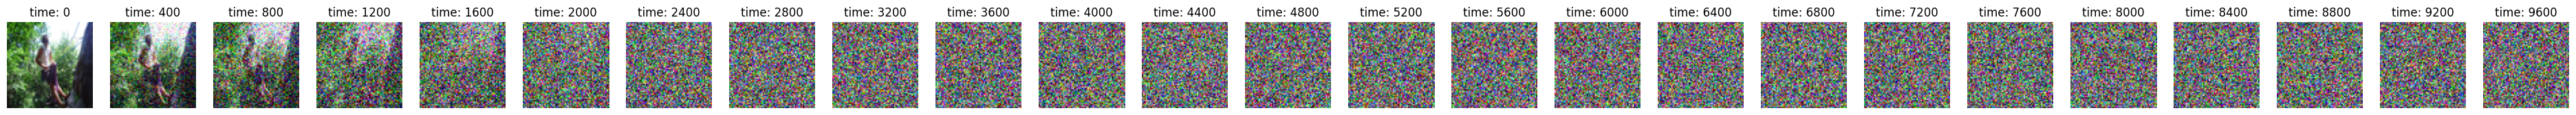

In [3]:
df = DiffusionModel(timesteps, height)
df.simulate_forward_diffusion(timesteps, dataset, image=None, num_images=25)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor([[[1.1467, 1.1086, 1.0612,  ..., 1.0615, 1.0763, 1.0964],
         [1.1564, 1.1202, 1.0762,  ..., 1.1010, 1.0844, 1.0414],
         [1.1386, 1.0958, 1.0863,  ..., 1.0377, 1.0861, 1.1153],
         ...,
         [0.7355, 0.5981, 0.0366,  ..., 1.1176, 1.1446, 1.1286],
         [0.7011, 0.6306, 0.5456,  ..., 1.1140, 1.1489, 1.1359],
         [1.2431, 1.1945, 1.2537,  ..., 1.1237, 1.1247, 1.1028]],

        [[1.0908, 1.0797, 1.1208,  ..., 1.0762, 1.0826, 1.1148],
         [1.1216, 1.1376, 1.0679,  ..., 1.0148, 1.0503, 1.0876],
         [1.1306, 1.0785, 1.0913,  ..., 1.0530, 1.0706, 1.1189],
         ...,
         [0.7283, 0.6301, 0.0961,  ..., 1.1245, 1.1329, 1.1165],
         [0.7505, 0.7325, 0.6932,  ..., 1.1228, 1.1394, 1.1052],
         [1.1956, 1.1732, 1.3023,  ..., 1.1276, 1.1434, 1.1162]],

        [[1.0851, 1.0823, 1.0790,  ..., 1.0912, 1.0516, 1.1036],
         [1.1294, 1.0905, 1.1158,  ..., 1.0851, 1.1115, 1.1086],
         [1.1641, 1.1439, 1.1348,  ..., 1.1237, 1.0665, 1.

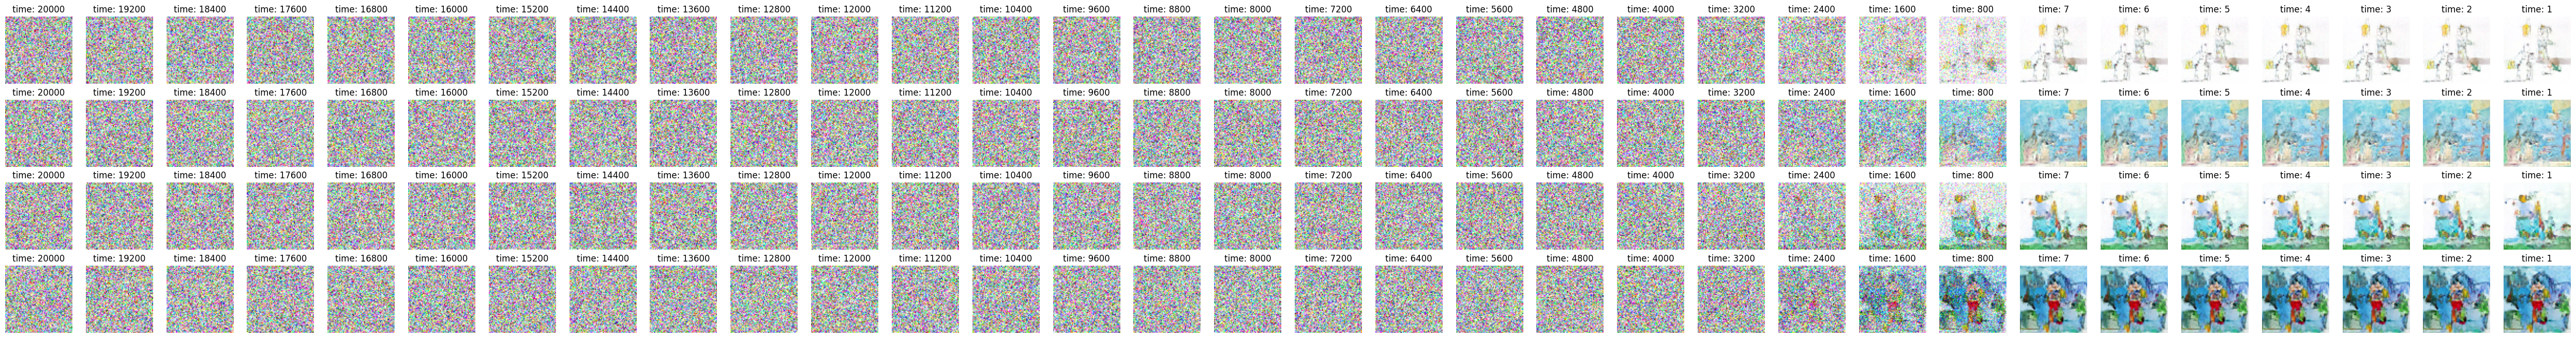

In [8]:
from model.diffusionModel import DiffusionModel
from model.unet import Unet
import matplotlib.pyplot as plt
import torch


# network hyperparameters
batch_size = 4
device = torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
n_feat = 512 # hidden dimension feature
max_text_len = 64 # word vector
height = 64 # 64x64 image
save_dir = './weights_humanart_kids_drawing/'
# diffusion hyperparameters
timesteps = 2000

df = DiffusionModel(timesteps, height)
model = Unet(in_channels=3, n_feat=n_feat, max_text_len=max_text_len, height=height, device=device).to(device)
model.load_state_dict(torch.load(save_dir+"model_3751.pth", map_location=device))

model.eval()
#model.train()

a = ('kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone',
     'kids_drawing, a cartoon girl singing into a microphone')

samples = df.sample_ddpm_context(model, 4, a,save_rate=800)
df.draw_samples_process(path='./generated_images/')
print(samples[0])
"""
samples = samples.detach().cpu().numpy()
for i, img in enumerate(samples):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    img = df.unorm(img)
    plt.imshow(img.permute(1,2,0))
"""

print('Imagenes generadas')

torch.randn(1, 512, 128)

In [3]:
from model.t5 import t5_encode_text
from torch import nn

In [10]:
m = nn.GELU()
input = torch.randn(2)
output = m(input)
input,output

(tensor([-0.2342, -0.2726]), tensor([-0.0954, -0.1070]))

In [13]:
torch.aminmax(t5_encode_text("Two young girls are smiling and laughing .")[0])

torch.return_types.aminmax(
min=tensor(-0.8496, device='cuda:0'),
max=tensor(0.6872, device='cuda:0'))